# Week 2 Exercises

* The exercise below should be completed using tools provided by numpy arrays. 
* You can use other given/developed functions from class notebook

In [1]:
from pathlib import Path
import requests
import numpy as np
import gzip
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Exercise 1

* Create a function get_MNIST() that downloads (or loads) the MNIST data, reshapes it, and stores it appropriately into the variables images and labels.


In [2]:
def get_MNIST():
  mnist_url = "http://yann.lecun.com/exdb/mnist/"
  img_file = "train-images-idx3-ubyte.gz"
  labels_file = "train-labels-idx1-ubyte.gz"

  for fname in [img_file, labels_file]:
    if Path(fname).is_file() :
        print(f"Found: {fname}")
        continue
    print(f"Downloading: {fname}")
    r = requests.get(mnist_url + fname)
    with open(fname, 'wb') as foo:
        foo.write(r.content)
  with gzip.open("train-images-idx3-ubyte.gz", 'rb') as foo:
        f = foo.read()
  with gzip.open("train-labels-idx1-ubyte.gz", 'rb') as eoo:
        e = eoo.read()
  images = np.array([b for b in f[16:]]).reshape(-1, 28*28) # stores all of reshaped images
  labels = [b for b in e[8:]] # stores all labels
  return images, labels

In [3]:
content = get_MNIST()


Found: train-images-idx3-ubyte.gz
Downloading: train-labels-idx1-ubyte.gz


In [4]:
images = content[0]
labels = content[1]

## Exercise 2

* Create a function visualize_6_digits() that creates a figure with subpanels to visualize 6 MNIST images. The 6 indices must be passed as an input.


In [5]:
def visualize_6_digits(lst):
  # fig = plt.figure()
  # for i, item in enumerate(lst):
    
  #   plt.subplot(3,2,i)
  #   plt.imshow(images[i].reshape(28,28),cmap = "Greys")
    
  fig, ax = plt.subplots(1, 6, figsize=(22,5))
  for i, item in enumerate(lst):
    ax[i].imshow(images[item].reshape(28,28),cmap = "Greys")

  plt.show()


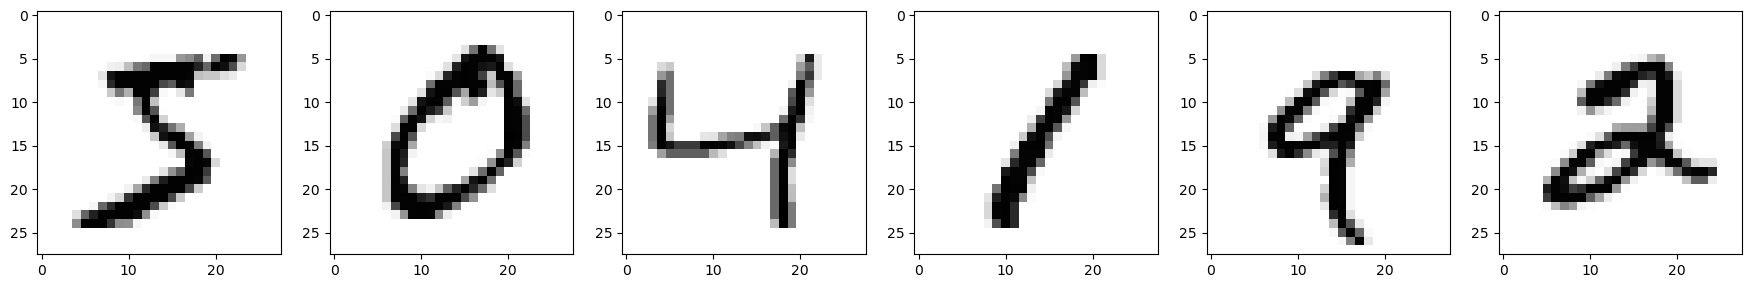

In [6]:
visualize_6_digits([0,1,2,3,4,5])

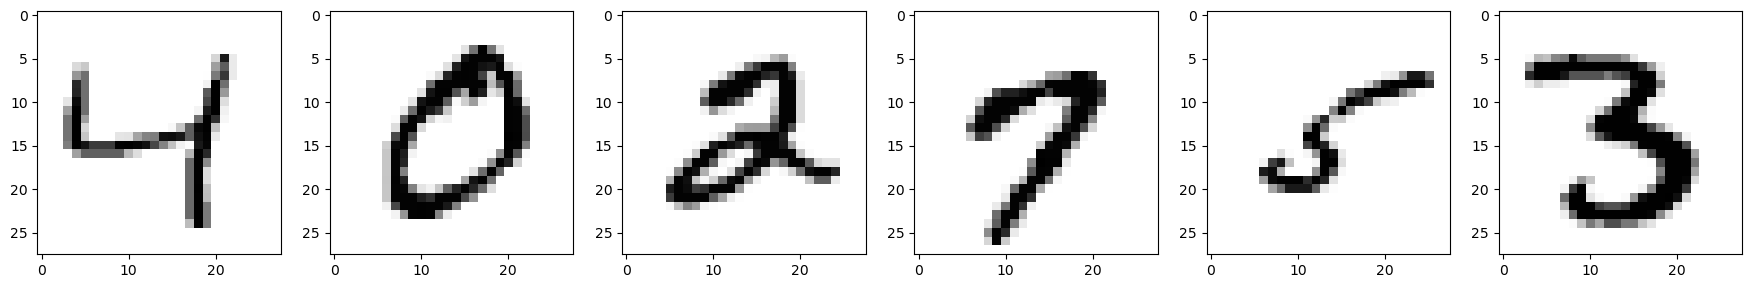

In [7]:
visualize_6_digits([2,1,5,15,11,12])

## Exercise 3

* Create a find_kNN() function and apply it to the example  blob dataset to correctly find the 10  nearest neighbors. 
* [Hint, use your function from last week that computes Euclidean distances.]


In [8]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize


def plot_clusters(X, y, p=None, p_label=None, neighbors=None):
    """
    Plots nearest neighbors of a given point.

    X:
        A 2-dimensional numpy array with coordinates
        of points in clusters
    y:
        A 1-dimensional numpy array with labels of points
    p:
        An array with coordinates of the point whose
        neighbors will be plotted.
    p_label:
        The predicted label of the point p.
    neighbors:
        A list of row numbers of X which are the nearest
        neighbors of the point p.
    """

    # build a custom colormap
    col_list = ['dodgerblue', 'limegreen', 'red', 'orange', 'fuchsia']
    colors = ListedColormap(col_list)
    norm = Normalize(0, len(col_list))

    plt.figure(figsize=(8, 8))
    with plt.style.context('seaborn'):
        scatter = plt.scatter(X[:, 0],
                              X[:, 1],
                              c=y,
                              s=90,
                              cmap=colors,
                              norm=norm,
                              label=y)
        if p is not None:
            p_col = "k" if p_label is None else colors(norm(p_label))
            plt.plot(p[0], p[1], marker="*", mfc=p_col, mec="k", ms=30, mew=2)
        if neighbors is not None:
            plt.scatter(X[neighbors, 0],
                        X[neighbors, 1],
                        edgecolors='black',
                        linewidth=3,
                        facecolors="None",
                        s=300)
        plt.legend(*scatter.legend_elements(),
                   markerscale=1.5,
                   prop={
                       "size": 12,
                       "weight": "normal"
                   })
    plt.show()

The 10 nearest neighbors are: [ 0 11 57 58 93 44 70 80 51 25]


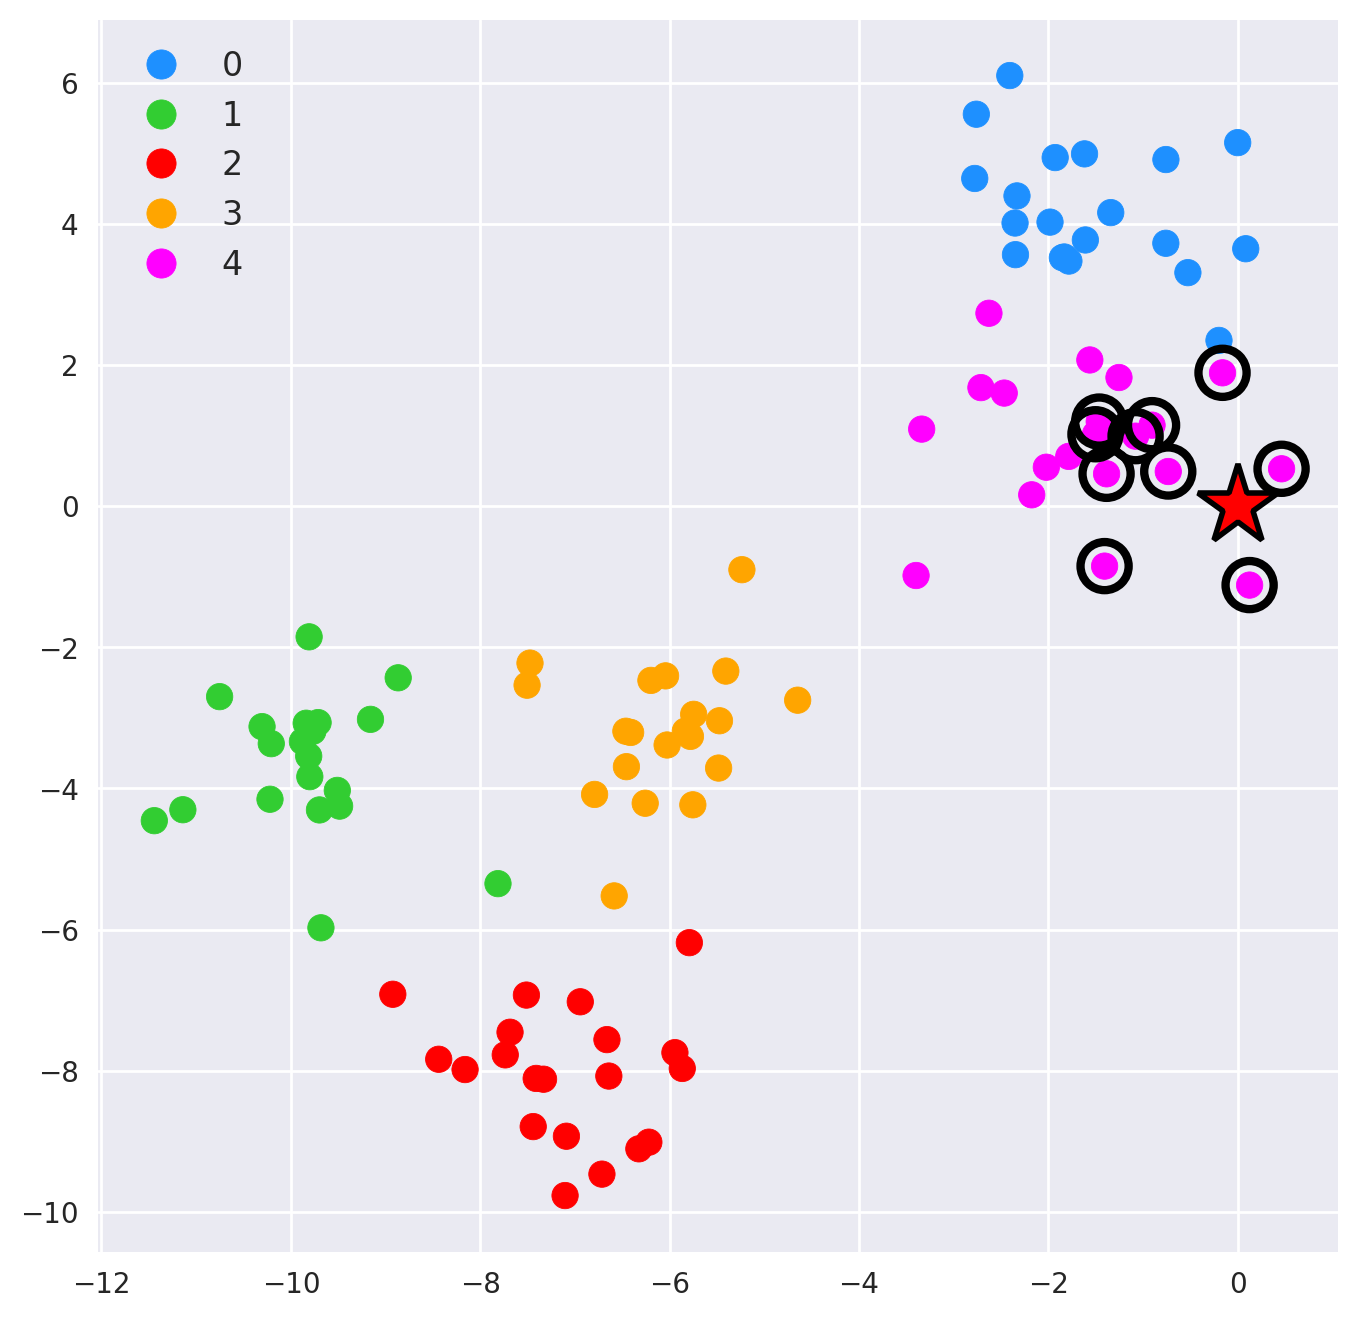

In [9]:
from sklearn.datasets import make_blobs


def find_kNN(X, origianl_pt):
    distance = np.sqrt(np.sum((X - origianl_pt)**2, axis=1))
    neighbors = np.argsort(distance)[:10]
    return neighbors


X, y = make_blobs(
    n_samples = 100,
    n_features = 2, 
    centers = 5, 
    cluster_std = 1, 
    random_state = 1
)

origianl_pt = np.array([0,0])
neighbors = find_kNN(X,origianl_pt)
print("The 10 nearest neighbors are: {}".format(neighbors))
plot_clusters(X, y, p=[0, 0], p_label=2, neighbors=neighbors)